In [1]:
#.libPaths(c("/home/data/refdir/Rlib","/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
library(ggplot2)
library(harmony)
rm(list = ls())
gc()
setwd('/home/data/t060324/jobs/aimin/')

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, r

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,7972657,425.8,14825640,791.8,10267055,548.4
Vcells,13707497,104.6,21468864,163.8,17823998,136.0


In [3]:
mergeData_T <- readRDS(file = './output/1.sangleCell_pre/OV_mergeData_T.RDS')

In [4]:
mergeData_T <- subset(mergeData_T,cellType !='unknow')

In [6]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 33)

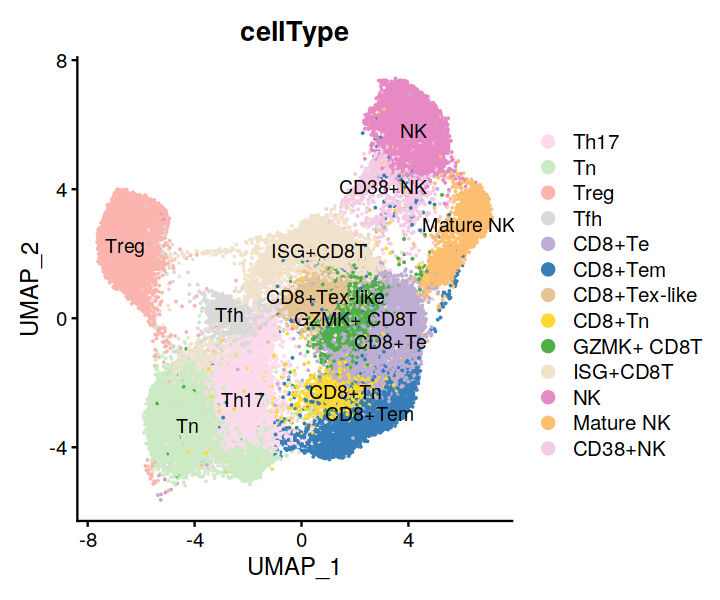

In [7]:
options(repr.plot.height = 5, repr.plot.width = 6)
dimP <- DimPlot(object = mergeData_T,reduction = 'umap',group.by = c('cellType'),cols = cellType_col[18:30], label = T)
dimP

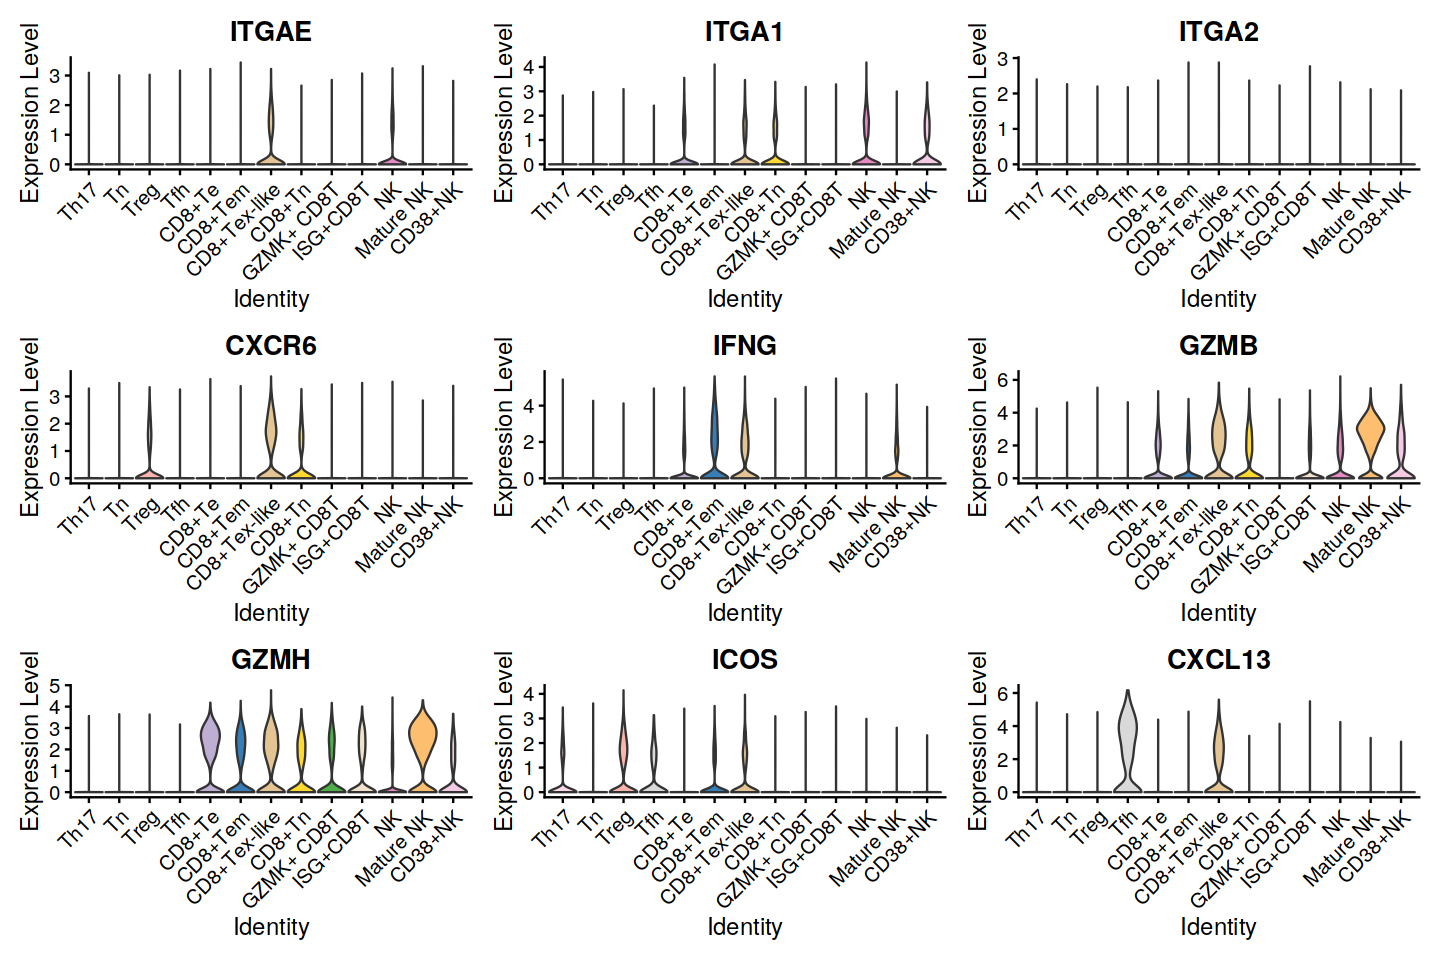

In [14]:
options(repr.plot.height = 8, repr.plot.width = 12)
VlnPlot(object = mergeData_T, features = c('ITGAE','ITGA1','ITGA2','CXCR6','IFNG','GZMB','GZMH','ICOS','CXCL13'),pt.size = 0,cols = cellType_col[18:30],group.by = 'cellType')

In [15]:
pdf(file = './output/bulk/section_4/0.Tex-like_Marker_heatmap.pdf',width = 12,height = 8)
VlnPlot(object = mergeData_T, features = c('ITGAE','ITGA1','ITGA2','CXCR6','IFNG','GZMB','GZMH','ICOS','CXCL13'),pt.size = 0,cols = cellType_col[18:30],group.by = 'cellType')
dev.off()

png 
  2